In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv("Titanic-Dataset.csv")

In [145]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.shape

(891, 12)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [150]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [151]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode(0)[0])
df= df.drop(columns=['Cabin'])

In [152]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

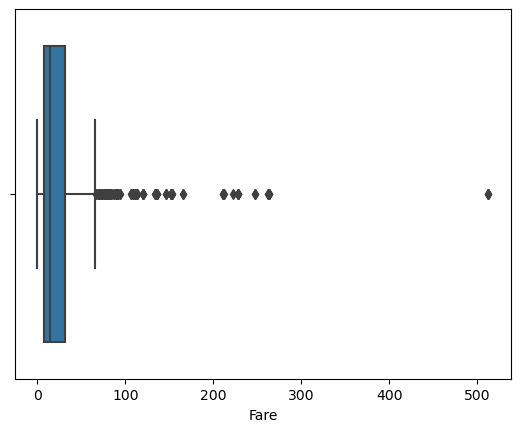

In [153]:
sns.boxplot(x=df['Fare'])
plt.show()

In [154]:
q1= df["Fare"].quantile(0.25)
q3=df["Fare"].quantile(0.75)
iqr= q3-q1

In [155]:
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [156]:
df= df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

In [157]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,28.748710,0.437419,0.340645,17.822091
std,260.116285,0.473796,0.73439,12.782123,0.899838,0.785914,13.578085
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,22.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.00000,28.000000,0.000000,0.000000,13.000000
75%,670.500000,1.000000,3.00000,34.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.00000,80.000000,5.000000,6.000000,65.000000


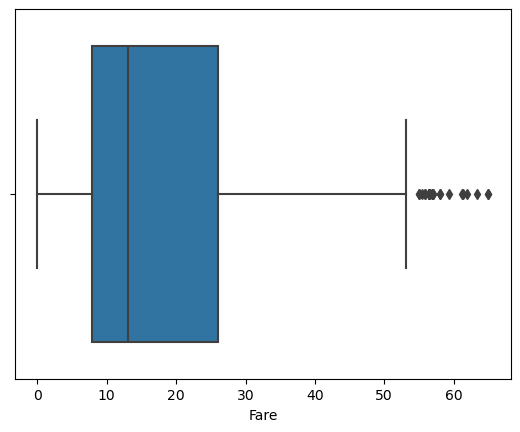

In [158]:
sns.boxplot(x=df['Fare'])
plt.show()

In [159]:
 from sklearn.preprocessing import StandardScaler


In [160]:
scaler = StandardScaler()
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])

In [161]:
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first= True)

In [162]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.528321,1,0,A/5 21171,-0.779117,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.215182,0,0,STON/O2. 3101282,-0.729373,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.489381,1,0,113803,2.599828,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.489381,0,0,373450,-0.720161,True,False,True
5,6,0,3,"Moran, Mr. James",-0.058613,0,0,330877,-0.690071,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.136897,0,0,211536,-0.355367,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.763176,0,0,112053,0.897459,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-0.058613,1,2,W./C. 6607,0.414752,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.215182,0,0,111369,0.897459,True,False,False
